# Tarea 3:
Diana Islas Flores

Problema 1: graficas de barra e histogramas

Una grafica de barras en pandas es simplemente "array.plot(kind='bar')". La altura de las barras es el valor y y la posicion de esta es el valor x correspondiente. 


Un histograma da la distribucion de una lista/array. Es decir, divide el rango de la lista en 'bins' y cuenta cuantos valores de la lista caen dentro de cada bin. Para obtener un histograma en Pandas es simplemente array.hist()

Para obtener los bins y el histograma, se utiliza la funcion de numpy histogram. Esta solo pide el array de datos y el numero de bins o el metodo para calcular este o lo puede hacer automatico. Matplotlib utiliza esta funcion para obtener la informacion necesaria para hacer el histograma. 

El siguiente ejemplo toma un vector de numeros aleatorios y calcula automaticamente los bins y el numero de datos en cada bin.

In [1]:
import numpy as np
import random
a = random.sample(range(1, 100), 45)

print 'el vector inicial es'
print a

hist, bin_edges = np.histogram(a)#histograma

print 'los limites de los bins son:'
print bin_edges
print  'el histograma o numero de datos en cada bin es:'
print hist

el vector inicial es
[26, 70, 34, 54, 75, 44, 13, 37, 42, 5, 27, 14, 90, 40, 71, 60, 52, 72, 36, 94, 59, 62, 53, 9, 67, 4, 1, 22, 18, 84, 89, 88, 24, 81, 23, 97, 73, 49, 82, 16, 31, 12, 86, 7, 96]
los limites de los bins son:
[  1.   10.6  20.2  29.8  39.4  49.   58.6  68.2  77.8  87.4  97. ]
el histograma o numero de datos en cada bin es:
[5 5 5 4 3 4 4 5 4 6]


Como se observa, el np.histogram da los limites de bins y los datos para el histograma. 

Si se quiere obtener un histograma 'normal', es decir, los datos del histograma suman a uno, se necesita poner el argumento de density = True (esto da la probability density function integrado sobre el rango de los bins)

Sin embargo, esto no da que la suma de los datos del histograma sobre el rango iguala a 1, sino que la integral sobre el rango sume a 1. Estos dos son iguales si el tamaño del intervalo de los bins es 1.

In [2]:
print 'el vector inicial es'
print a
hist, bin_edges = np.histogram(a,density = True)
print 'los limites de los bins son:'
print bin_edges
print  'el histograma o numero de datos en cada bin es:'
print hist
print 'suma de datos en cada bin = ',hist.sum(),'=/= 1'
print 'suma de (datos en cada bin x el tamaño de intervalo de bins) = ',np.sum(hist * np.diff(bin_edges))

el vector inicial es
[26, 70, 34, 54, 75, 44, 13, 37, 42, 5, 27, 14, 90, 40, 71, 60, 52, 72, 36, 94, 59, 62, 53, 9, 67, 4, 1, 22, 18, 84, 89, 88, 24, 81, 23, 97, 73, 49, 82, 16, 31, 12, 86, 7, 96]
los limites de los bins son:
[  1.   10.6  20.2  29.8  39.4  49.   58.6  68.2  77.8  87.4  97. ]
el histograma o numero de datos en cada bin es:
[ 0.01157407  0.01157407  0.01157407  0.00925926  0.00694444  0.00925926
  0.00925926  0.01157407  0.00925926  0.01388889]
suma de datos en cada bin =  0.104166666667 =/= 1
suma de (datos en cada bin x el tamaño de intervalo de bins) =  1.0


Como se dijo anteriormente, matplotlib (plt.hist(a)) utiliza esta funcion para obtener los datos para graficar el histograma (lo que tambien hace pandas ya que usa matplotlib)

En pandas, se puede utilizar .value_counts() o .value_counts(normalize = True) para contar contar el numero de valores en cada bin (normalizada da el histograma que suman a 1).

In [3]:
import pandas as pd
data = np.random.choice(np.arange(10), size=10000)
s = pd.Series(data)
s.value_counts()

5    1077
9    1073
0    1039
7     998
4     993
3     981
8     979
1     963
6     961
2     936
dtype: int64

In [4]:
s.value_counts(normalize = True)

5    0.1077
9    0.1073
0    0.1039
7    0.0998
4    0.0993
3    0.0981
8    0.0979
1    0.0963
6    0.0961
2    0.0936
dtype: float64

In [5]:
s.value_counts(normalize = True).sum()

1.0

.



Ejercicios Pandas Notebook 11:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Ejercicio 1: SE NECESITA EL ARCHIVO 'Daily_clim_data_Auckland.csv'

In [7]:
a = pd.read_csv('../data/Daily_clim_data_Auckland.csv')

Para hacer el index datetime, se utiliza el comando 'date_range' desde el primer dia. Adicionalmente, se agrega una columna para el año y otra para el mes. 

In [8]:
a.columns = ['full_date', 'rain','tmax','tmin']
a.index = pd.date_range(start='1972-01-01', periods=len(a))
a['full_date'] = pd.to_datetime(a['full_date'])
a['year'], a['month'] = a['full_date'].dt.year, a['full_date'].dt.month
cols = a.columns.tolist()
cols1 = cols[:1]+cols[-2:]+cols[1:4]
cols1
a = a[cols1]

In [9]:
a.index

DatetimeIndex(['1972-01-01', '1972-01-02', '1972-01-03', '1972-01-04',
               '1972-01-05', '1972-01-06', '1972-01-07', '1972-01-08',
               '1972-01-09', '1972-01-10',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', length=15341, freq='D')

Ejercicio 2:

El comando 'loc' se utiliza para elegir cada variable.

In [10]:
rain_all = a.loc[:,'rain']
tmax_all = a.loc[:,'tmax']
tmin_all = a.loc[:,'tmin']

El comando 'resample' se utiliza para obtener los promedios mensuales (de cada mes individual) (para la temperatura) y el total mensual (para la lluvia)

In [11]:
tot_rain = rain_all.resample('M',convention = 'end').sum()
avg_mxtmp = tmax_all.resample('M',convention = 'end').mean()
avg_mntmp = tmin_all.resample('M',convention = 'end').mean()

In [12]:
print tot_rain

1972-01-31    418.6
1972-02-29     98.9
1972-03-31    839.9
1972-04-30    489.5
1972-05-31    399.9
1972-06-30    223.3
1972-07-31    373.1
1972-08-31    124.0
1972-09-30    879.9
1972-10-31    514.0
1972-11-30    389.3
1972-12-31    323.2
1973-01-31    287.4
1973-02-28    367.9
1973-03-31    353.1
1973-04-30    636.2
1973-05-31    598.3
1973-06-30    287.4
1973-07-31     56.6
1973-08-31    213.5
1973-09-30    307.6
1973-10-31    422.6
1973-11-30    541.2
1973-12-31    281.8
1974-01-31    114.6
1974-02-28    381.3
1974-03-31    274.6
1974-04-30    194.4
1974-05-31    203.8
1974-06-30    458.5
              ...  
2011-07-31    331.4
2011-08-31    241.2
2011-09-30    273.5
2011-10-31    274.5
2011-11-30    442.0
2011-12-31    101.3
2012-01-31    318.3
2012-02-29    163.0
2012-03-31    224.9
2012-04-30    134.7
2012-05-31    283.8
2012-06-30    270.5
2012-07-31    189.9
2012-08-31    105.1
2012-09-30    383.2
2012-10-31    537.0
2012-11-30    274.4
2012-12-31    452.3
2013-01-31    376.9


In [13]:
print avg_mxtmp

1972-01-31    16.206452
1972-02-29    18.406897
1972-03-31    14.712903
1972-04-30    12.350000
1972-05-31     8.593548
1972-06-30     5.646667
1972-07-31     5.570968
1972-08-31     6.674194
1972-09-30     8.916667
1972-10-31    10.506452
1972-11-30    13.960000
1972-12-31    14.358065
1973-01-31    16.954839
1973-02-28    18.142857
1973-03-31    15.570968
1973-04-30    11.710000
1973-05-31     7.800000
1973-06-30     5.456667
1973-07-31     5.212903
1973-08-31     6.532258
1973-09-30    10.130000
1973-10-31    11.445161
1973-11-30    12.233333
1973-12-31    17.845161
1974-01-31    16.870968
1974-02-28    18.017857
1974-03-31    15.958065
1974-04-30    13.166667
1974-05-31    10.219355
1974-06-30     6.183333
                ...    
2011-07-31     7.619355
2011-08-31     7.777419
2011-09-30     9.466667
2011-10-31    12.606452
2011-11-30    12.243333
2011-12-31    18.738710
2012-01-31    15.435484
2012-02-29    17.300000
2012-03-31    14.761290
2012-04-30    14.613333
2012-05-31    10

In [14]:
print avg_mntmp

1972-01-31     8.593548
1972-02-29     9.775862
1972-03-31     9.590323
1972-04-30     7.326667
1972-05-31     3.077419
1972-06-30     0.590000
1972-07-31     1.629032
1972-08-31     0.316129
1972-09-30     3.996667
1972-10-31     4.900000
1972-11-30     7.016667
1972-12-31     6.670968
1973-01-31     8.954839
1973-02-28    10.310714
1973-03-31     8.648387
1973-04-30     6.023333
1973-05-31     4.674194
1973-06-30     2.306667
1973-07-31     1.009677
1973-08-31     1.361290
1973-09-30     3.666667
1973-10-31     5.193548
1973-11-30     6.000000
1973-12-31     9.096774
1974-01-31     8.687097
1974-02-28    11.939286
1974-03-31     8.245161
1974-04-30     7.413333
1974-05-31     5.725806
1974-06-30     1.576667
                ...    
2011-07-31     2.970968
2011-08-31     3.180645
2011-09-30     4.146667
2011-10-31     5.764516
2011-11-30     5.696667
2011-12-31    10.232258
2012-01-31     8.409677
2012-02-29    10.727586
2012-03-31     7.867742
2012-04-30     8.880000
2012-05-31     5

Ejercicio 3:


El comando 'query' se utilza para filtral los años entre 1981 y el 2000. El comando 'loc' se utiliza para elegir cada variable. El comando 'groupby' se utiliza para obtener el promedio de todos los años por mes  (climatologia).

In [15]:
b = a.query('year >=1981 & year <= 2000')
rainfall = b.loc[:,'rain']
maxtemp = b.loc[:,'tmax']
mintemp = b.loc[:,'tmin']

crf = rainfall.groupby(rainfall.index.month).mean()
cmxt = maxtemp.groupby(maxtemp.index.month).mean()
cmnt = mintemp.groupby(mintemp.index.month).mean()

Se grafica la climatologia como se observa en el cuaderno de pandas (11).

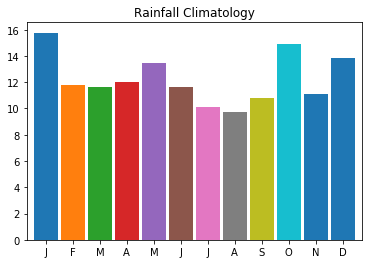

In [16]:
f, ax = plt.subplots()
crf.plot(ax=ax, kind='bar', rot=0, width=0.9,title = 'Rainfall Climatology')
ax.set_xticklabels(list('JFMAMJJASOND'));


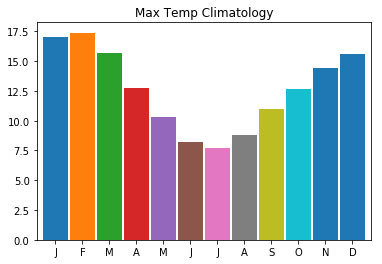

In [17]:
f, ax = plt.subplots()
cmxt.plot(ax=ax, kind='bar', rot=0, width=0.9,title = 'Max Temp Climatology')
ax.set_xticklabels(list('JFMAMJJASOND'));

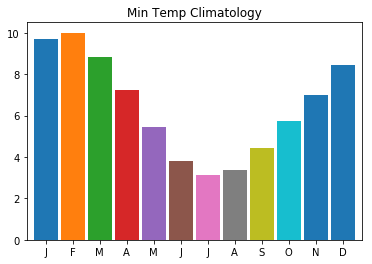

In [18]:
f, ax = plt.subplots()
cmnt.plot(ax=ax, kind='bar', rot=0, width=0.9,title = 'Min Temp Climatology')
ax.set_xticklabels(list('JFMAMJJASOND'));

Ejecicio 4:

Para obtener el WRT, se obtine el valor - promedio total y despues se utiliza 'groupby' para obtener las climatologias de estas. 

In [19]:
wrt_rain = rainfall - rainfall.mean()
wrt_rain_clim = wrt_rain.groupby(wrt_rain.index.month).mean()

wrt_tmax = maxtemp - maxtemp.mean()
wrt_tmax_clim = wrt_tmax.groupby(wrt_tmax.index.month).mean()

wrt_tmin = mintemp - mintemp.mean()
wrt_tmin_clim = wrt_tmin.groupby(wrt_tmin.index.month).mean()

In [20]:
print wrt_rain_clim

1     3.528635
2    -0.419477
3    -0.639430
4    -0.247446
5     1.218635
6    -0.637779
7    -2.108623
8    -2.499430
9    -1.456946
10    2.639119
11   -1.151113
12    1.623957
Name: rain, dtype: float64


In [21]:
print wrt_tmax_clim

1     4.435208
2     4.778607
3     3.080047
4     0.155993
5    -2.303663
6    -4.380840
7    -4.912856
8    -3.833501
9    -1.649507
10    0.089563
11    1.805993
12    3.027628
Name: tmax, dtype: float64


In [22]:
print wrt_tmin_clim

1     3.305347
2     3.591559
3     2.419863
4     0.808277
5    -0.940137
6    -2.617056
7    -3.276911
8    -3.043686
9    -1.971890
10   -0.657879
11    0.573944
12    2.023734
Name: tmin, dtype: float64


Ejercicio 5:

Se grafica la serie de tiempo de la temperatura min y max con 'plot'

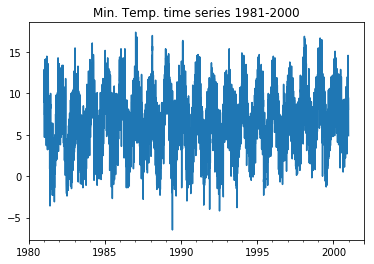

In [23]:
mintemp.plot(title = 'Min. Temp. time series 1981-2000')

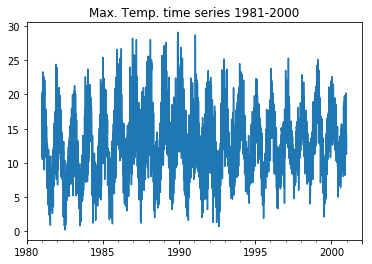

In [24]:
maxtemp.plot(title = 'Max. Temp. time series 1981-2000')

Ejecicio 6 y 7:

Para obtener la linea de regresion linea, se utiliza linregress de scipy.stats. Se hizo un array (x) correspondiente a cada valor del datetime de los datos. Esto es necesario debido al hecho de que es necesario utilizar datos en float con este comando y el index de los datos son strings. 

In [25]:
from scipy import stats
import numpy as np

In [26]:
x = np.linspace(1981.,2000.99726027,len(mintemp))
y = mintemp
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x,y)
print 'Linear Trend from Scipy for min temp:'
print 'Slope = ',slope1,'; Intercept = ',intercept1,'; R-val = ',r_value1
y = maxtemp
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
print 'Linear Trend from Scipy for max temp:'
print 'Slope = ',slope2,'; Intercept = ',intercept2,'; R-val = ',r_value2

Linear Trend from Scipy for min temp:
Slope =  0.0693916984161 ; Intercept =  -131.751220021 ; R-val =  0.110644025038
Linear Trend from Scipy for max temp:
Slope =  0.0941548813306 ; Intercept =  -174.858899572 ; R-val =  0.118491178102


Se obtinen los datos de la linea de tendencia con las pendientes y las intecciones calculadas con linregress y se agregan a dataset para cada temperatura.

In [27]:
y1 = x*slope1 + intercept1
y2 = x*slope2 + intercept2
b['tmin_trnd'] = y1
b['tmax_trnd'] = y2


/Users/dislas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dislas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Se grafica utilizando 'plot'

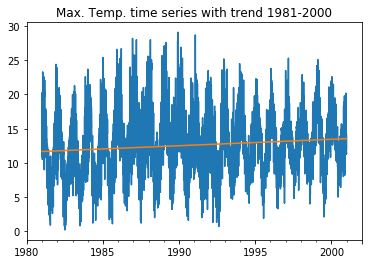

In [28]:
f, ax = plt.subplots()
maxtemp.plot(ax=ax,title = 'Max. Temp. time series with trend 1981-2000')
b.loc[:,'tmax_trnd'].plot(ax=ax)

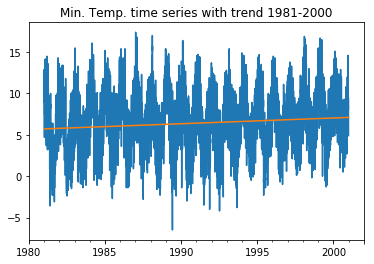

In [29]:
f, ax = plt.subplots()
mintemp.plot(ax=ax,title = 'Min. Temp. time series with trend 1981-2000')
b.loc[:,'tmin_trnd'].plot(ax=ax)